In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
ls '/mnt/bluewhale/evam/S8z/'

ClsPlanck/  Clsgg/  Clsgk/  Clskk/


In [3]:
ls '/mnt/bluewhale/evam/S8z/ClsPlanck/'

DESPlanck_Cls_gk.png                DESPlanck_Cls_kk.png
DESPlanck_Cls_gk_lmax3xNside_0.txt  DESPlanck_Cls_kk_lmax3xNside_0.txt
DESPlanck_Cls_gk_lmax3xNside_1.txt  DESPlanck_Cls_kk_lmax3xNside_1.txt
DESPlanck_Cls_gk_lmax3xNside_2.txt  DESPlanck_Cls_kk_lmax3xNside_2.txt
DESPlanck_Cls_gk_lmax3xNside_3.txt  DESPlanck_Cls_kk_lmax3xNside_3.txt
DESPlanck_Cls_gk_lmax3xNside_4.txt  Planck_Cls_kk_lmax3xNside.txt


In [4]:
ls '/mnt/bluewhale/evam/S8z/Clsgg/'

DES_Cls_0_0.txt  DES_Cls_2_3.txt              DES_Cls_lmax3xNside_1_1.txt
DES_Cls_0_1.txt  DES_Cls_2_4.txt              DES_Cls_lmax3xNside_1_2.txt
DES_Cls_0_2.txt  DES_Cls_3_3.txt              DES_Cls_lmax3xNside_1_3.txt
DES_Cls_0_3.txt  DES_Cls_3_4.txt              DES_Cls_lmax3xNside_1_4.txt
DES_Cls_0_4.txt  DES_Cls_4_4.txt              DES_Cls_lmax3xNside_2_2.txt
DES_Cls_1_1.txt  DES_Cls_lmax3xNside_0_0.txt  DES_Cls_lmax3xNside_2_3.txt
DES_Cls_1_2.txt  DES_Cls_lmax3xNside_0_1.txt  DES_Cls_lmax3xNside_2_4.txt
DES_Cls_1_3.txt  DES_Cls_lmax3xNside_0_2.txt  DES_Cls_lmax3xNside_3_3.txt
DES_Cls_1_4.txt  DES_Cls_lmax3xNside_0_3.txt  DES_Cls_lmax3xNside_3_4.txt
DES_Cls_2_2.txt  DES_Cls_lmax3xNside_0_4.txt  DES_Cls_lmax3xNside_4_4.txt


In [5]:
ls '/mnt/bluewhale/evam/S8z/Clsgk/'

DES_Cls_gk.png                  DES_Cls_gk_lmax3xNside_2_2.txt
DES_Cls_gk_lmax3xNside_0_0.txt  DES_Cls_gk_lmax3xNside_2_3.txt
DES_Cls_gk_lmax3xNside_0_1.txt  DES_Cls_gk_lmax3xNside_3_0.txt
DES_Cls_gk_lmax3xNside_0_2.txt  DES_Cls_gk_lmax3xNside_3_1.txt
DES_Cls_gk_lmax3xNside_0_3.txt  DES_Cls_gk_lmax3xNside_3_2.txt
DES_Cls_gk_lmax3xNside_1_0.txt  DES_Cls_gk_lmax3xNside_3_3.txt
DES_Cls_gk_lmax3xNside_1_1.txt  DES_Cls_gk_lmax3xNside_4_0.txt
DES_Cls_gk_lmax3xNside_1_2.txt  DES_Cls_gk_lmax3xNside_4_1.txt
DES_Cls_gk_lmax3xNside_1_3.txt  DES_Cls_gk_lmax3xNside_4_2.txt
DES_Cls_gk_lmax3xNside_2_0.txt  DES_Cls_gk_lmax3xNside_4_3.txt
DES_Cls_gk_lmax3xNside_2_1.txt


In [6]:
ls '/mnt/bluewhale/evam/S8z/Clskk/'

DES_Cls_kk.png                  DES_Cls_kk_lmax3xNside_1_2.txt
DES_Cls_kk_lmax3xNside_0_0.txt  DES_Cls_kk_lmax3xNside_1_3.txt
DES_Cls_kk_lmax3xNside_0_1.txt  DES_Cls_kk_lmax3xNside_2_2.txt
DES_Cls_kk_lmax3xNside_0_2.txt  DES_Cls_kk_lmax3xNside_2_3.txt
DES_Cls_kk_lmax3xNside_0_3.txt  DES_Cls_kk_lmax3xNside_3_3.txt
DES_Cls_kk_lmax3xNside_1_1.txt


In [25]:
def load_thcls(th_outdir, file_prefix, nmaps):
    cls_arr = []
    for i in range(nmaps):
        for j in range(i, nmaps):
            fname = os.path.join(th_outdir, file_prefix + '_{}_{}.txt'.format(i, j))
            if not os.path.isfile(fname): #spin0-spin0
                raise ValueError('Missing workspace: ', fname)

            cls_arr.append(np.loadtxt(fname, usecols=1))

    ell = np.loadtxt(fname, usecols=0)

    return ell, np.array(cls_arr)

def load_thcls_gk(nmaps_g, nmaps_k):
    th_outdir = '/mnt/bluewhale/evam/S8z/Clsgk/'
    file_prefix = 'DES_Cls_gk_lmax3xNside'
    cls_arr = []
    for i in range(nmaps_g):
        for j in range(nmaps_k):
            fname = os.path.join(th_outdir, file_prefix + '_{}_{}.txt'.format(i, j))
            if not os.path.isfile(fname): #spin0-spin0
                raise ValueError('Missing workspace: ', fname)

            cls_arr.append(np.loadtxt(fname, usecols=1))

    ell = np.loadtxt(fname, usecols=0)

    return ell, np.array(cls_arr)

def load_thcls_Planck():
    fdir = '/mnt/bluewhale/evam/S8z/ClsPlanck/'
    cls_arr = []
    for i in range(5):
        fname = os.path.join(fdir, 'DESPlanck_Cls_gk_lmax3xNside_{}.txt'.format(i))
        cls_arr.append(np.loadtxt(fname, usecols=1))
    for i in range(4):
        fname = os.path.join(fdir, 'DESPlanck_Cls_kk_lmax3xNside_{}.txt'.format(i))
        cls_arr.append(np.loadtxt(fname, usecols=1)) 
        cls_arr.append(cls_arr[-1] * 0)

    fname = os.path.join(fdir, 'Planck_Cls_kk_lmax3xNside.txt'.format(i))
    cls_arr.append(np.loadtxt(fname, usecols=1))
    ell = np.loadtxt(fname, usecols=0)
    
    return ell, np.array(cls_arr)

def load_cls_all_matrix_th():
    # All th_ell are the same
    th_outdir = '/mnt/bluewhale/evam/S8z/Clsgg/'
    th_ell, Clsgg_ar = load_thcls(th_outdir, 'DES_Cls_lmax3xNside', 5)

    th_outdir = '/mnt/bluewhale/evam/S8z/Clskk/'
    th_ell, Clskk_ar = load_thcls(th_outdir, 'DES_Cls_kk_lmax3xNside', 4)

    th_outdir = '/mnt/bluewhale/evam/S8z/Clsgk/'
    th_ell, Clsgk_ar = load_thcls_gk(5, 4)

    th_outdir = '/mnt/bluewhale/evam/S8z/ClsPlanck/'
    th_ell, ClsPlanck_ar = load_thcls_Planck()
    
    # Checked that all EE's are the same as in the array.
    Clskk_full_mat = np.zeros((8, 8, th_ell.shape[0]))
    i, j = np.triu_indices(4)
    Clskk_full_mat[::2, ::2][i, j] = Clskk_ar
    Clskk_full_mat[::2, ::2][j, i] = Clskk_ar
    i, j = np.triu_indices(8)
    Clskk_ar_full = Clskk_full_mat[i, j]
    
    th_cls_all = np.zeros((14, 14, th_ell.shape[0]))

    i, j = np.triu_indices(5)
    th_cls_all[:5, :5][i, j] = Clsgg_ar

    i, j = np.triu_indices(8)
    th_cls_all[5:-1, 5:-1][i, j] = Clskk_ar_full

    th_cls_all[:, -1] = ClsPlanck_ar

    for i in range(5):
        th_cls_all[i, 5:-1:2] = Clsgk_ar[i * 4 : (i + 1) * 4]

    i, j = np.triu_indices(14)
    th_cls_all_ar = th_cls_all[i, j]
    th_cls_all[j, i] = th_cls_all_ar
    
    return th_cls_all

In [35]:
############# Load theory cl matrix 

th_cls_all = load_cls_all_matrix_th()

############# Load obs. cl matrix

outdir = '/mnt/bluewhale/gravityls_3/S8z/Cls/all_together/' 

lbpw_obs_cls_all = np.load(os.path.join(outdir, 'cl_all_no_noise.npz'))
lbpw, obs_cls_all = lbpw_obs_cls_all['l'], lbpw_obs_cls_all['cls']

lbpw_obs_cls_all = np.load(os.path.join(outdir, 'cl_all_with_noise.npz'))
lbpw, obs_cls_all_wn = lbpw_obs_cls_all['l'], lbpw_obs_cls_all['cls']

############### Load DES gc. cl matrix (computed independently)

desgc_outdir = '/mnt/bluewhale/gravityls_3/S8z/Cls/des_gcl/' 

desgc_cls_file = np.load(os.path.join(desgc_outdir, 'des_w_cl_ns4096.npz'))
desgc_ell = desgc_cls_file['l']
desgc_cls_indep = desgc_cls_file['cls']  # Noise is removed from these Cls
desgc_nls_arr_indep = np.load(os.path.join(desgc_outdir, 'des_w_cl_shot_noise_ns4096.npz'))['cls']

############### Load DES sh. noise

outdir = '/mnt/bluewhale/gravityls_3/S8z/Cls/all_together/' 
desgc_nls_arr = np.load(os.path.join(outdir, 'des_w_cl_shot_noise_ns4096.npz'))['cls']
dessh_nls_arr = np.load(os.path.join(outdir, 'des_sh_metacal_rot0-10_noise_ns4096.npz'))['cls']

############### Load TT Cl for Planck (computed independently)

Planck_outdir = '/mnt/bluewhale/gravityls_3/S8z/Cls/Planck/' 

Planck_clsTT_file = np.load(os.path.join(Planck_outdir, 'cl_TT_Planck.npz'))
Planck_clsTT = Planck_clsTT_file['cls']

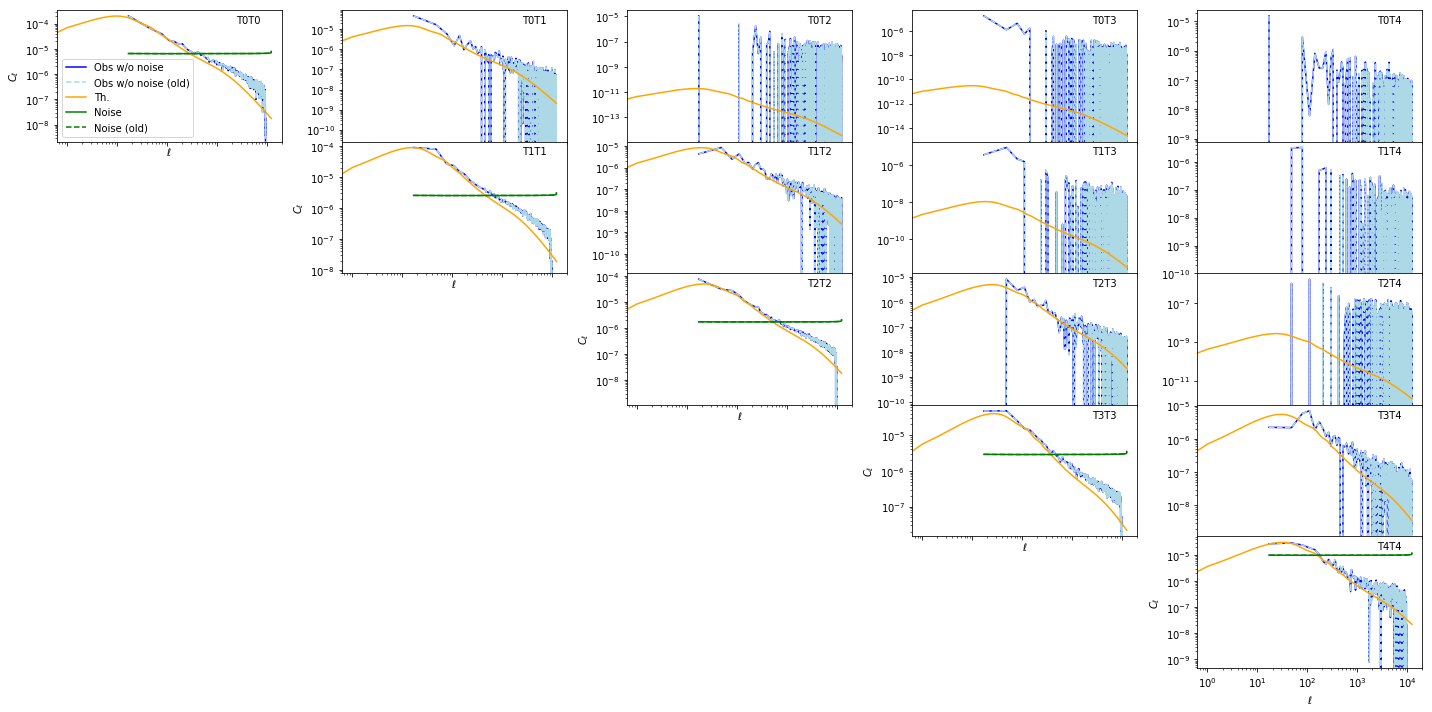

In [46]:
# Check we have same Cl's for galaxy clustering comparing with the independently computed one.

f, axs = plt.subplots(5, 5, figsize=(20, 10), sharex=True, gridspec_kw={'hspace':0})

labels = ['T0', 'T1', 'T2', 'T3', 'T4', 'E5', 'B5', 'E6', 'B6', 'E7', 'B7', 'E8', 'B8', 'Tp9']


for i in range(5):
    for j in range(i, 5):
        axs[i, j].semilogx(lbpw, obs_cls_all[i, j], c='blue', label='Obs w/o noise')
        axs[i, j].semilogx(lbpw, desgc_cls_indep [i, j], c='lightblue', ls='--', label='Obs w/o noise (old)')
        axs[i, j].semilogx(th_ell, th_cls_all[i, j], c='orange', label='Th.')
        if not np.all(th_cls_all[i, j] == 0):
            axs[i, j].set_yscale('log')
            
        axs[i, j].text(0.8, 0.9, labels[i] + labels[j],  transform=axs[i,j].transAxes)
        
        if i != j:
            axs[j, i].set_visible(False)
        else:
            axs[i, i].semilogx(lbpw, desgc_nls_arr[i], c='green', label='Noise')
            axs[i, i].semilogx(lbpw, desgc_nls_arr_indep[i], c='green', ls='--', label='Noise (old)')
            axs[i, i].set_xlabel(r'$\ell$')
            axs[i, i].set_ylabel(r'$C_{\ell}$')
        

axs[0,0].legend(loc=0)
plt.tight_layout()
plt.show()
plt.close()

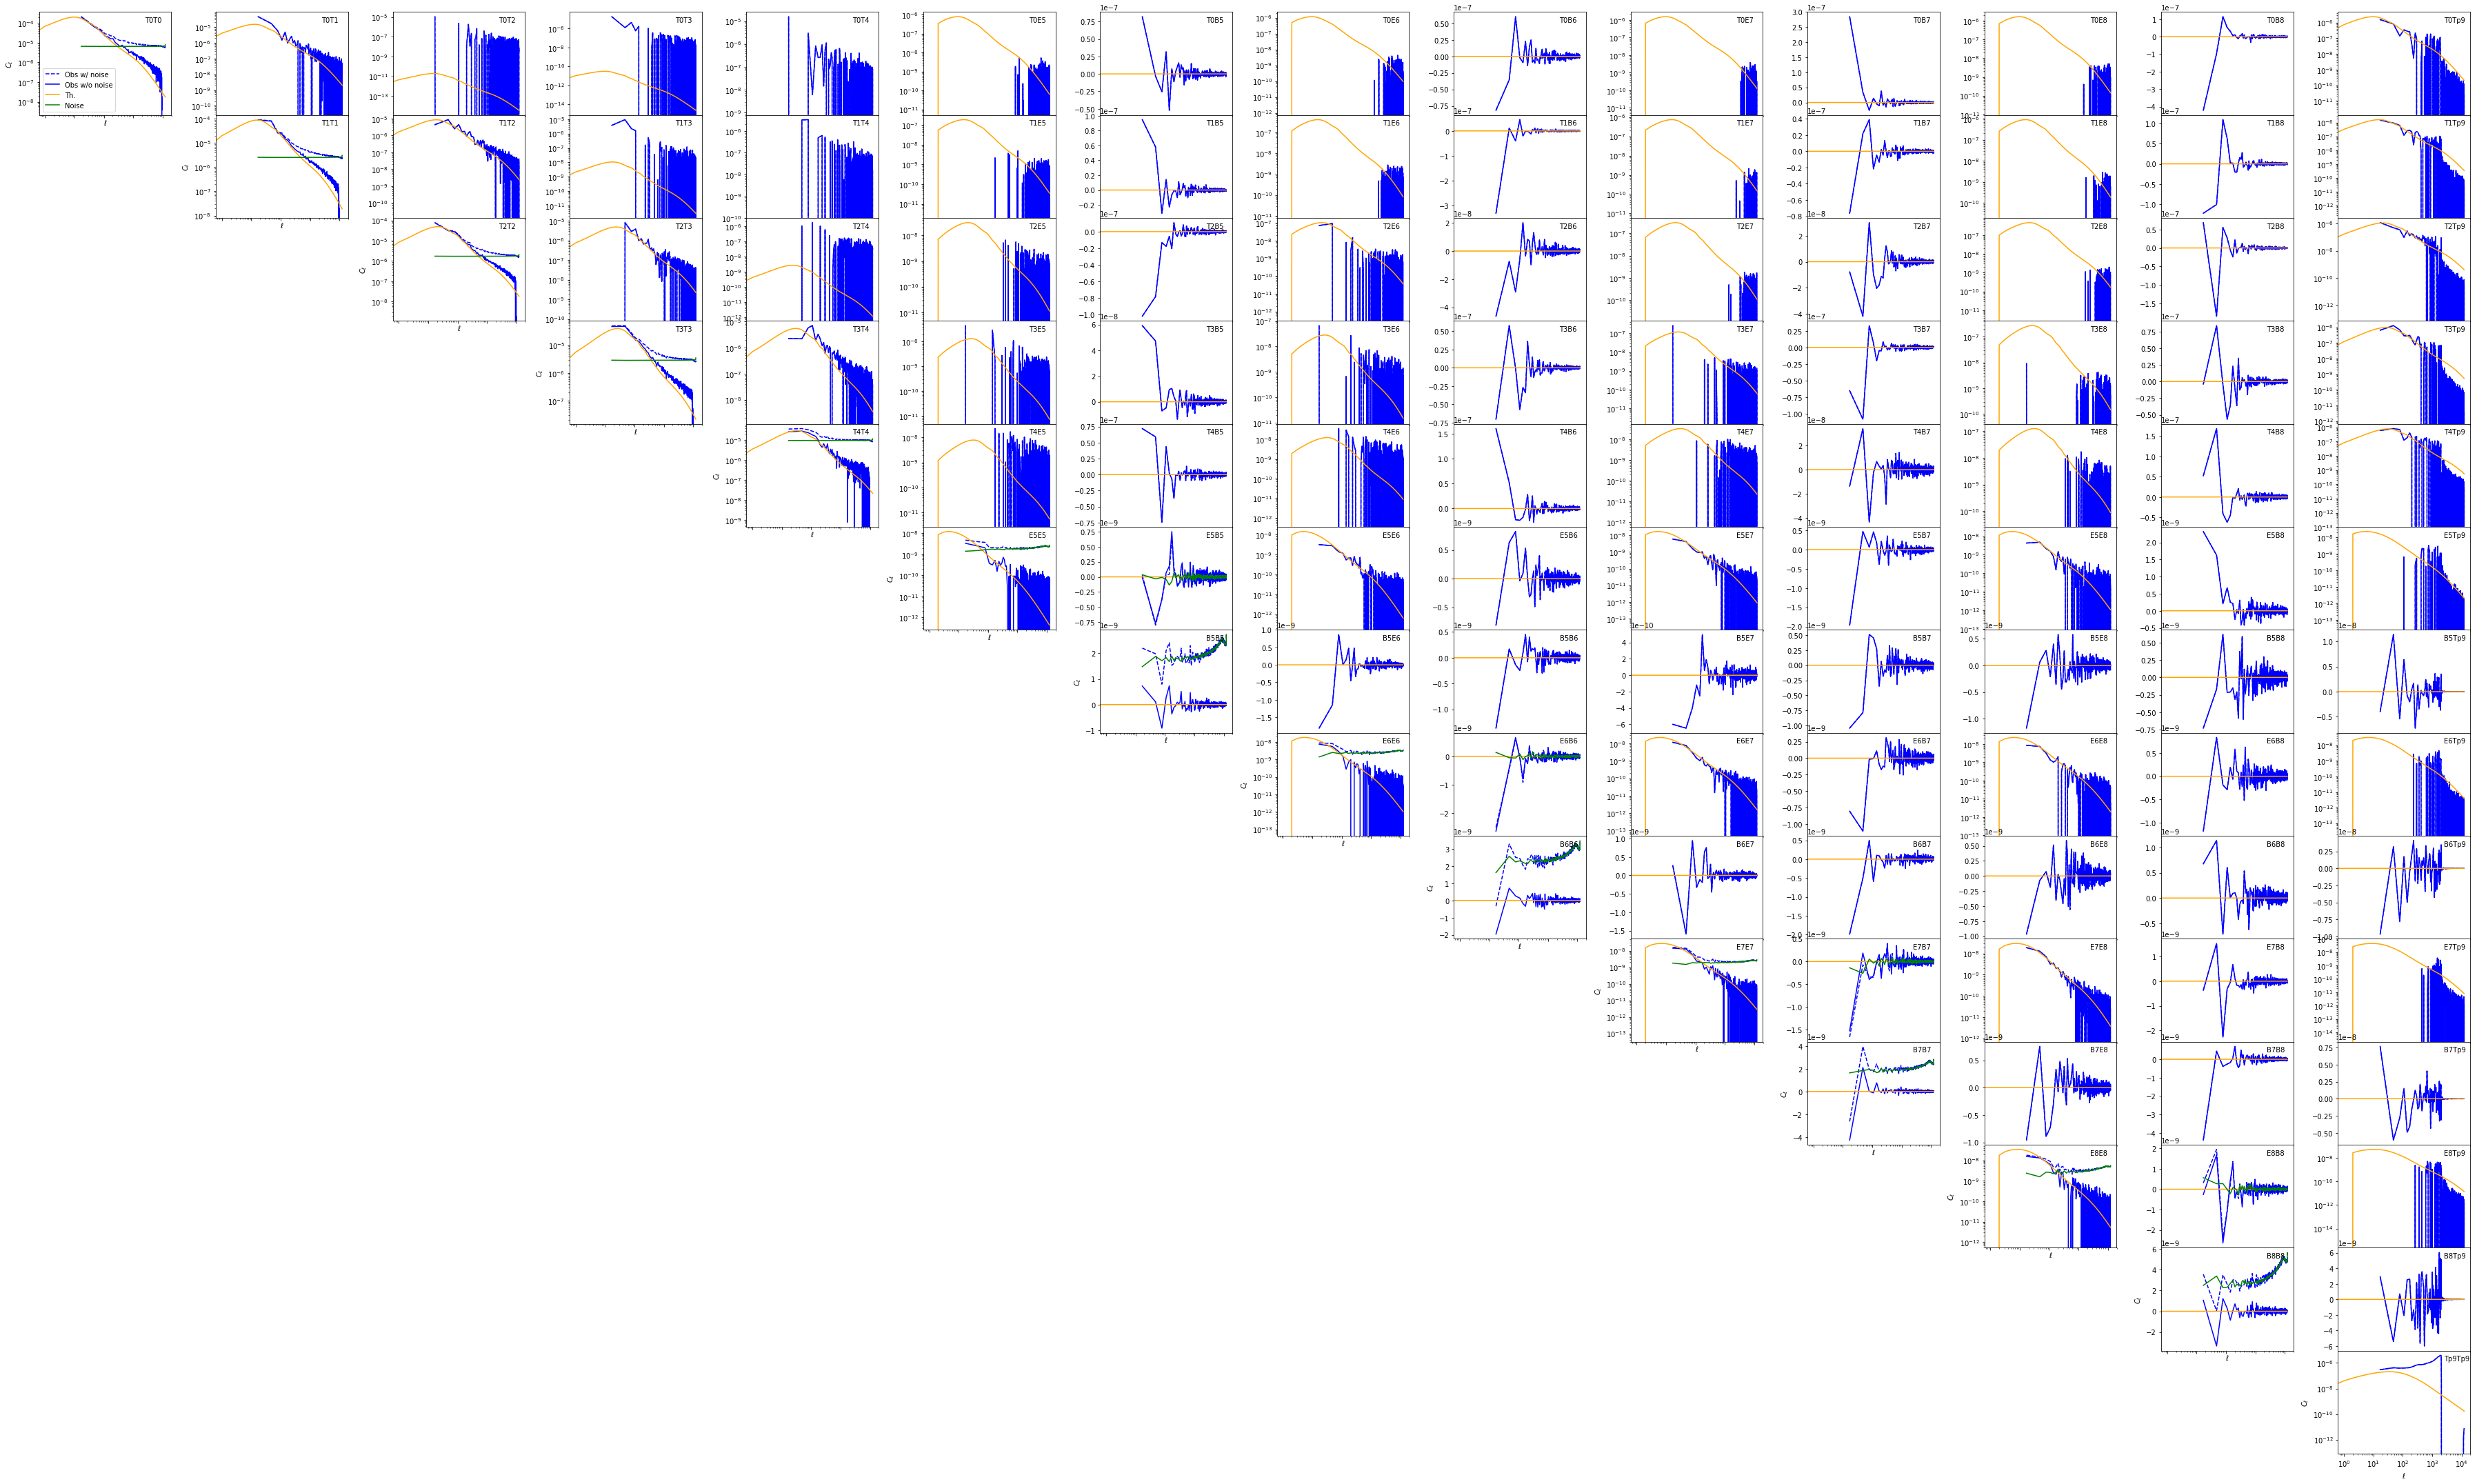

In [47]:
f, axs = plt.subplots(14, 14, figsize=(50, 30), sharex=True, gridspec_kw={'hspace':0})

labels = ['T0', 'T1', 'T2', 'T3', 'T4', 'E5', 'B5', 'E6', 'B6', 'E7', 'B7', 'E8', 'B8', 'Tp9']


for i in range(14):
    for j in range(i, 14):
        axs[i, j].semilogx(lbpw, obs_cls_all_wn[i, j], c='blue', ls='--', label='Obs w/ noise')
        axs[i, j].semilogx(lbpw, obs_cls_all[i, j], c='blue', label='Obs w/o noise')
        axs[i, j].semilogx(th_ell, th_cls_all[i, j], c='orange', label='Th.')
        if not np.all(th_cls_all[i, j] == 0):
            axs[i, j].set_yscale('log')
            
        axs[i, j].text(0.8, 0.9, labels[i] + labels[j],  transform=axs[i,j].transAxes)
        
        if i != j:
            axs[j, i].set_visible(False)
        else:
            axs[i, i].set_xlabel(r'$\ell$')
            axs[i, i].set_ylabel(r'$C_{\ell}$')
        
for i in range(5):
    axs[i, i].semilogx(lbpw, desgc_nls_arr[i], c='green', label='Noise')

for i in range(4):
    ixplot = 5 + i * 2
    axs[ixplot, ixplot].semilogx(lbpw, dessh_nls_arr[i, 0, 0], c='green', label='Noise')
    axs[ixplot, ixplot + 1].semilogx(lbpw, dessh_nls_arr[i, 0, 1], c='green', label='Noise')
    axs[ixplot + 1, ixplot + 1].semilogx(lbpw, dessh_nls_arr[i, 1, 1], c='green', label='Noise')


axs[0,0].legend(loc=0)
plt.tight_layout()
plt.show()
plt.close()

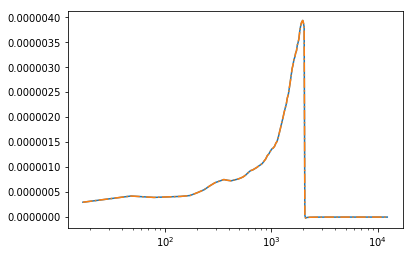

In [21]:
plt.semilogx(lbpw, obs_cls_all[-1, -1])
plt.semilogx(lbpw, Planck_clsTT[0, 0], '-.')
plt.show()
plt.close()

In [17]:
def load_thErrors():
    err = []
    for i in range(5):
        for j in range(i, 5):
            fname = os.path.join(outdir, 'des_c0000_{}{}.npz'.format(i, j))
            err.append(np.sqrt(np.diag(np.load(fname)['arr_0'])))
    return np.array(err)

In [18]:
# err_arr = load_thErrors()